In [1]:
pip install matplotlib

  Using cached matplotlib-3.4.2-cp38-cp38-manylinux1_x86_64.whl (10.3 MB)
     |████████████████████████████████| 3.0 MB 4.2 MB/s eta 0:00:01
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.3.1-cp38-cp38-manylinux1_x86_64.whl (1.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nltk

  Using cached nltk-3.6.2-py3-none-any.whl (1.5 MB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [108]:
df=pd.read_csv('news_gathered_data.csv')
df

,index,title,media,date,datetime,desc,link,img
0,0,Bellevue police Chief Mylett leaves for new ch...,The Seattle Times,NaN,NaN,An investigation by the Bothell Police Departm...,https://www.seattletimes.com/seattle-news/east...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
1,1,Police on Scene of Washington Mass Shooting in...,Yahoo News,NaN,NaN,Washington DC Police Department said a six-yea...,https://news.yahoo.com/police-scene-washington...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
2,2,Civilian police oversight across the country a...,Cleveland.com,NaN,NaN,"In Seattle, for example, that city's Community...",https://www.cleveland.com/cityhall/2021/07/civ...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
3,3,"Police can't solve all the beach problems, nei...",West Seattle Blog...,NaN,NaN,Guests at the ACC meeting included a lieutenan...,https://westseattleblog.com/2021/07/police-can...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
4,4,Nederland Police Department arrests and respon...,Port Arthur News,NaN,NaN,An information reported was made in the 3000 b...,https://www.panews.com/2021/07/17/nederland-po...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
...,...,...,...,...,...,...,...,...
28305,339,When will barriers surrounding Seattle PD's Ea...,KOMO,NaN,NaN,"“It's just going to be a gradual process,” sai...",https://komonews.com/news/local/when-will-barr...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
28306,340,3rd suspect in Seattle woman's death found in ...,WFAA,NaN,NaN,He was taken into custody without incident by ...,https://www.wfaa.com/article/news/local/marise...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
28307,341,SPD plans to remove concrete barriers around E...,Seattle PI,NaN,NaN,The concrete barriers surrounding the Seattle ...,https://www.seattlepi.com/local/seattlenews/ar...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
28308,342,We Must Change the Culture of the Seattle Poli...,The Stranger,NaN,NaN,... package of comprehensive reforms to change...,https://www.thestranger.com/slog/2021/04/02/56...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."


In [109]:
df.describe()

,index,date,datetime
count,28310.000000,0.0,0.0
mean,159.520134,NaN,NaN
std,98.576039,NaN,NaN
min,0.000000,NaN,NaN
25%,73.000000,NaN,NaN
50%,154.000000,NaN,NaN
75%,243.000000,NaN,NaN
max,343.000000,NaN,NaN


In [110]:
# Drop index and img columns
df = df.drop(['index', 'img', 'date', 'datetime'], axis=1)
df

,title,media,desc,link
0,Bellevue police Chief Mylett leaves for new ch...,The Seattle Times,An investigation by the Bothell Police Departm...,https://www.seattletimes.com/seattle-news/east...
1,Police on Scene of Washington Mass Shooting in...,Yahoo News,Washington DC Police Department said a six-yea...,https://news.yahoo.com/police-scene-washington...
2,Civilian police oversight across the country a...,Cleveland.com,"In Seattle, for example, that city's Community...",https://www.cleveland.com/cityhall/2021/07/civ...
3,"Police can't solve all the beach problems, nei...",West Seattle Blog...,Guests at the ACC meeting included a lieutenan...,https://westseattleblog.com/2021/07/police-can...
4,Nederland Police Department arrests and respon...,Port Arthur News,An information reported was made in the 3000 b...,https://www.panews.com/2021/07/17/nederland-po...
...,...,...,...,...
28305,When will barriers surrounding Seattle PD's Ea...,KOMO,"“It's just going to be a gradual process,” sai...",https://komonews.com/news/local/when-will-barr...
28306,3rd suspect in Seattle woman's death found in ...,WFAA,He was taken into custody without incident by ...,https://www.wfaa.com/article/news/local/marise...
28307,SPD plans to remove concrete barriers around E...,Seattle PI,The concrete barriers surrounding the Seattle ...,https://www.seattlepi.com/local/seattlenews/ar...
28308,We Must Change the Culture of the Seattle Poli...,The Stranger,... package of comprehensive reforms to change...,https://www.thestranger.com/slog/2021/04/02/56...


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28310 entries, 0 to 28309
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   28310 non-null  object
 1   media   24851 non-null  object
 2   desc    28310 non-null  object
 3   link    28310 non-null  object
dtypes: object(4)
memory usage: 884.8+ KB


In [112]:
#Fill in Missing values in 'media'
df['media']=df.media.fillna('Others')

In [113]:
#Number of unique news sources
len(df.media.unique())

71

In [114]:
#Top 10 news sources
top_10=df.media.value_counts().head(10)
top_10

Others                      3459
KIRO-TV                     2555
The Seattle Times           2390
MyNorthwest.com             1955
KING 5                      1592
KOMO                        1582
CHS Capitol Hill Seattle    1380
South Seattle Emerald       1371
SPD Blotter                 1136
KUOW                         899
Name: media, dtype: int64

In [115]:
#All Media Sources
df.media.unique()

array(['The Seattle Times', 'Yahoo News', 'Cleveland.com',
       'West Seattle Blog...', 'Port Arthur News', 'Others', 'NBC News',
       'Washington State Wire', 'KUOW', 'CHS Capitol Hill Seattle',
       'KNDU', 'Westside Seattle', 'PubliCola', 'South Seattle Emerald',
       'KIRO-TV', 'Niners Nation', 'Patch', 'KOMO', 'ESPN',
       'Sports Illustrated', 'NewsOne', 'Seattle PI', 'USA Today',
       'CBS San Francisco', '247 Sports', 'Field Gulls', 'Sportskeeda',
       'Real Change', 'Touchdown Wire', 'KING 5', 'Just The News',
       'Hudson Valley Post', 'SPD Blotter', 'CBS News', 'The Stranger',
       'Council Connection', 'The Hill', 'Crosscut', 'Q13 FOX',
       'The Chronicle', 'Kent Reporter', 'SiliconANGLE',
       'MyNorthwest.com', 'The New York Times', 'CONAN Daily',
       'KING5.com', 'KOMO News', 'FOX 10 Phoenix', 'Fox News', 'KIMA',
       'Seattle Met', 'The Spokesman-Review', 'Law Officer',
       'Everett Herald', 'New York Post', 'FOX 5 Atlanta', 'Metro Weekly'

In [116]:
#Create Local vs national media dictionary 0-local, 1 = national "Others" =0
media_dict = {
    'The Seattle Times': 0, 'Yahoo News':1, 'Cleveland.com':1,
       'West Seattle Blog...':0, 'Port Arthur News':0, 'Others':0, 'NBC News':1,
       'Washington State Wire':0, 'KUOW':0, 'CHS Capitol Hill Seattle':0,
       'KNDU':0, 'Westside Seattle':0, 'PubliCola':0, 'South Seattle Emerald':0,
       'KIRO-TV':0, 'Niners Nation':0, 'Patch':0, 'KOMO':0, 'ESPN':1,
       'Sports Illustrated':1, 'NewsOne':0, 'Seattle PI':0, 'USA Today':1,
       'CBS San Francisco':0, '247 Sports':0, 'Field Gulls':0, 'Sportskeeda':0,
       'Real Change':0, 'Touchdown Wire':0, 'KING 5':0, 'Just The News':0,
       'Hudson Valley Post':0, 'SPD Blotter':0, 'CBS News':1, 'The Stranger':0,
       'Council Connection':0, 'The Hill':1, 'Crosscut':0,  'Q13 FOX':0,
       'The Chronicle':0, 'Kent Reporter':0, 'SiliconANGLE':0,
       'MyNorthwest.com':0, 'The New York Times':1, 'CONAN Daily':0,
       'KING5.com':0, 'KOMO News':0, 'FOX 10 Phoenix':1, 'Fox News':1, 'KIMA':0,
       'Seattle Met':0, 'The Spokesman-Review':0, 'Law Officer':0,
       'Everett Herald':0, 'New York Post':1, 'FOX 5 Atlanta':1, 'Metro Weekly':0,
       'KCTV5':0, 'Wall Street Journal':1, 'KXL':0, 'Liberation News':0,
       'Daily Fly':0, 'Forbes':1, 'Washington Examiner':0, 'Star Tribune':0,
       'My Ballard':0, 'Living Snoqualmie':0, 'Bellevue Reporter':0,
       'Business - Insider':1,'CNN':1, 'WFAA':1
}

In [117]:
df['Local']=[media_dict[x] for x in df['media']]
#media_dict['CNN']
df.head()

,title,media,desc,link,Local
0,Bellevue police Chief Mylett leaves for new ch...,The Seattle Times,An investigation by the Bothell Police Departm...,https://www.seattletimes.com/seattle-news/east...,0
1,Police on Scene of Washington Mass Shooting in...,Yahoo News,Washington DC Police Department said a six-yea...,https://news.yahoo.com/police-scene-washington...,1
2,Civilian police oversight across the country a...,Cleveland.com,"In Seattle, for example, that city's Community...",https://www.cleveland.com/cityhall/2021/07/civ...,1
3,"Police can't solve all the beach problems, nei...",West Seattle Blog...,Guests at the ACC meeting included a lieutenan...,https://westseattleblog.com/2021/07/police-can...,0
4,Nederland Police Department arrests and respon...,Port Arthur News,An information reported was made in the 3000 b...,https://www.panews.com/2021/07/17/nederland-po...,0


In [118]:
df=df[df['Local']==0]
df.head()

,title,media,desc,link,Local
0,Bellevue police Chief Mylett leaves for new ch...,The Seattle Times,An investigation by the Bothell Police Departm...,https://www.seattletimes.com/seattle-news/east...,0
3,"Police can't solve all the beach problems, nei...",West Seattle Blog...,Guests at the ACC meeting included a lieutenan...,https://westseattleblog.com/2021/07/police-can...,0
4,Nederland Police Department arrests and respon...,Port Arthur News,An information reported was made in the 3000 b...,https://www.panews.com/2021/07/17/nederland-po...,0
5,WEST SEATTLE CRIME WATCH: 2 reader reports,West Seattle Blog...,Sent in to SPD but sharing for awareness.” ......,https://westseattleblog.com/2021/07/west-seatt...,0
6,Washington Supreme Court reinstates King Count...,Others,Lyles and Obet were killed by Seattle officers...,https://www.spokesman.com/stories/2021/jul/16/...,0


In [119]:
df.shape

(25642, 5)

In [120]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

#Tokenize and Normalize (standardize) the text by removing all punctuation 
#from 'title' and 'desc' making all text lower case

df.title = df.title.apply(lambda x: nltk.RegexpTokenizer(r"\w+").tokenize(x.lower()))
df.desc = df.desc.apply(lambda x: nltk.RegexpTokenizer(r"\w+").tokenize(x.lower()))

/opt/conda/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [121]:
#Remove Stop words from the text and lemmatize
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['police','seattle', 'spd', 'department', 'officer', 'officers']
stopwords.extend(newStopWords)
df.title = df.title.apply(lambda x: [word for word in x if word not in stopwords])
df.desc = df.desc.apply(lambda x: [word for word in x if word not in stopwords])

In [122]:
#create trigram from tokenized list
from nltk.util import ngrams
def ngramconvert(df,n=3):
    for item in df[['title', 'desc']].columns:
        df['newtri'+item]=df[item].apply(lambda token_list: list(ngrams(token_list, n)))
    return df

In [123]:
ngramconvert(df, n=3)

<ipython-input-122-e2f044128ccd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['newtri'+item]=df[item].apply(lambda token_list: list(ngrams(token_list, n)))


,title,media,desc,link,Local,newtrititle,newtridesc
0,"[bellevue, chief, mylett, leaves, new, challen...",The Seattle Times,"[investigation, bothell, found, accuser, housi...",https://www.seattletimes.com/seattle-news/east...,0,"[(bellevue, chief, mylett), (chief, mylett, le...","[(investigation, bothell, found), (bothell, fo..."
3,"[solve, beach, problems, neighbors, agree]",West Seattle Blog...,"[guests, acc, meeting, included, lieutenant, s...",https://westseattleblog.com/2021/07/police-can...,0,"[(solve, beach, problems), (beach, problems, n...","[(guests, acc, meeting), (acc, meeting, includ..."
4,"[nederland, arrests, responses, july, 5]",Port Arthur News,"[information, reported, made, 3000, block, the...",https://www.panews.com/2021/07/17/nederland-po...,0,"[(nederland, arrests, responses), (arrests, re...","[(information, reported, made), (reported, mad..."
5,"[west, crime, watch, 2, reader, reports]",West Seattle Blog...,"[sent, sharing, awareness, report, let, us, kn...",https://westseattleblog.com/2021/07/west-seatt...,0,"[(west, crime, watch), (crime, watch, 2), (wat...","[(sent, sharing, awareness), (sharing, awarene..."
6,"[washington, supreme, court, reinstates, king,...",Others,"[lyles, obet, killed, obet, shot, auburn, requ...",https://www.spokesman.com/stories/2021/jul/16/...,0,"[(washington, supreme, court), (supreme, court...","[(lyles, obet, killed), (obet, killed, obet), ..."
...,...,...,...,...,...,...,...
28302,"[bodycam, video, shows, response, pierce, county]",KING 5,"[reported, times, troyer, called, 911, dispatc...",https://www.king5.com/article/news/local/tacom...,0,"[(bodycam, video, shows), (video, shows, respo...","[(reported, times, troyer), (times, troyer, ca..."
28305,"[barriers, surrounding, pd, east, precinct]",KOMO,"[going, gradual, process, said, valerie, carso...",https://komonews.com/news/local/when-will-barr...,0,"[(barriers, surrounding, pd), (surrounding, pd...","[(going, gradual, process), (gradual, process,..."
28307,"[plans, remove, concrete, barriers, around, ea...",Seattle PI,"[concrete, barriers, surrounding, east, precin...",https://www.seattlepi.com/local/seattlenews/ar...,0,"[(plans, remove, concrete), (remove, concrete,...","[(concrete, barriers, surrounding), (barriers,..."
28308,"[must, change, culture]",The Stranger,"[package, comprehensive, reforms, change, way,...",https://www.thestranger.com/slog/2021/04/02/56...,0,"[(must, change, culture)]","[(package, comprehensive, reforms), (comprehen..."


In [133]:
from nltk.probability import FreqDist

#Initialize FreqDist objects
fdist_title = FreqDist()
fdist_desc = FreqDist()

#Measure of the frequency of words in the 'title' column
for lists_ in df['title']:
    for words in lists_:
        fdist_title[words]+=1
        
title_word_freq = pd.Series(fdist_title, name='freq_title').sort_values(ascending=False)

#Measure of the frequency of words in the 'desc' column
for lists_ in df['desc']:
    for words in lists_:
        fdist_desc[words]+=1
        
desc_word_freq = pd.Series(fdist_desc, name='freq_desc').sort_values(ascending=False)


In [131]:
#Calculating the top 50 words 
word_freq_table = pd.DataFrame(desc_word_freq).join(title_word_freq)

#word_freq_table['freq_total']= word_freq_table['freq_desc']+word_freq_table['freq_title']
word_freq_table = word_freq_table.fillna(int(0))
word_freq_table.head(20).sort_values(by=['freq_desc','freq_title'], ascending=False)

,freq_desc,freq_title
public,2951,264.0
city,2868,1468.0
safety,2735,75.0
said,2643,75.0
crime,2508,99.0
laws,2449,84.0
year,2339,560.0
dependable,2254,0.0
professional,2254,0.0
respectful,2254,0.0


In [176]:
#Trigram for news headlines
trigram_list =[]

for trigrams_ in df['newtrititle']:
    trigram_list.append(trigrams_)
trigram_headlines =pd.DataFrame(trigram_list)
trigram_headlines

,0,1,2,3,4,5,6,7
0,"(bellevue, chief, mylett)","(chief, mylett, leaves)","(mylett, leaves, new)","(leaves, new, challenges)",None,None,None,None
1,"(solve, beach, problems)","(beach, problems, neighbors)","(problems, neighbors, agree)",None,None,None,None,None
2,"(nederland, arrests, responses)","(arrests, responses, july)","(responses, july, 5)",None,None,None,None,None
3,"(west, crime, watch)","(crime, watch, 2)","(watch, 2, reader)","(2, reader, reports)",None,None,None,None
4,"(washington, supreme, court)","(supreme, court, reinstates)","(court, reinstates, king)","(reinstates, king, county)","(king, county, inquest)",None,None,None
...,...,...,...,...,...,...,...,...
25637,"(bodycam, video, shows)","(video, shows, response)","(shows, response, pierce)","(response, pierce, county)",None,None,None,None
25638,"(barriers, surrounding, pd)","(surrounding, pd, east)","(pd, east, precinct)",None,None,None,None,None
25639,"(plans, remove, concrete)","(remove, concrete, barriers)","(concrete, barriers, around)","(barriers, around, east)","(around, east, precinct)",None,None,None
25640,"(must, change, culture)",None,None,None,None,None,None,None


In [177]:
trigram_headlines =trigram_headlines.stack()

In [178]:
trigram_headlines =pd.DataFrame(trigram_headlines)
trigram_headlines.columns = ['trigram_headlines']
trigram_headlines=trigram_headlines.reset_index().drop(['level_0', 'level_1'], axis=1)
trigram_headlines= trigram_headlines[trigram_headlines['trigram_headlines']!='None']

In [179]:
trigram_headlines.value_counts().head(30)

trigram_headlines            
(richard, sherman, arrested)     382
(seahawk, richard, sherman)      290
(update, former, seahawk)        290
(former, seahawk, richard)       290
(kiro, 7, news)                  282
(remember, lexi, harris)         273
(lexi, harris, killed)           263
(fallen, lexi, harris)           262
(arrest, man, suspected)         244
(city, council, votes)           237
(concrete, barriers, around)     210
(best, candidate, south)         196
(recommends, firing, two)        186
(purloined, perfume, north)      185
(recover, purloined, perfume)    185
(mourners, gather, remember)     182
(gather, remember, lexi)         182
(suspect, shot, major)           181
(shoots, suspect, puyallup)      179
(public, memorial, service)      176
(lethal, weapons, ban)           176
(new, version, less)             176
(less, lethal, weapons)          176
(version, less, lethal)          176
(council, reviews, new)          176
(reviews, new, version)          176
(leave, 

In [186]:
#Trigram for news article summaries
trigram_sumlist =[]

for trigrams_ in df['newtridesc']:
    trigram_sumlist.append(trigrams_)
trigram_summaries =pd.DataFrame(trigram_sumlist)
trigram_summaries

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,"(investigation, bothell, found)","(bothell, found, accuser)","(found, accuser, housing)","(accuser, housing, costs)","(housing, costs, 62)","(costs, 62, less)","(62, less, area)","(less, area, groceries)","(area, groceries, 20)","(groceries, 20, less)",None,None,None,None,None
1,"(guests, acc, meeting)","(acc, meeting, included)","(meeting, included, lieutenant)","(included, lieutenant, sergeant)","(lieutenant, sergeant, southwest)","(sergeant, southwest, precinct)","(southwest, precinct, manager)","(precinct, manager, parks)","(manager, parks, contingent)","(parks, contingent, talked)",None,None,None,None,None
2,"(information, reported, made)","(reported, made, 3000)","(made, 3000, block)","(3000, block, theft)","(block, theft, reported)","(theft, reported, 1800)","(reported, 1800, block)","(1800, block, nederland)","(block, nederland, avenue)","(nederland, avenue, july)","(avenue, july, 7)","(july, 7, assault)","(7, assault, offensive)","(assault, offensive, touch)","(offensive, touch, family)"
3,"(sent, sharing, awareness)","(sharing, awareness, report)","(awareness, report, let)","(report, let, us)","(let, us, know)","(us, know, westseattleblog)","(know, westseattleblog, gmail)","(westseattleblog, gmail, com)","(gmail, com, thank)",None,None,None,None,None,None
4,"(lyles, obet, killed)","(obet, killed, obet)","(killed, obet, shot)","(obet, shot, auburn)","(shot, auburn, require)","(auburn, require, testimony)","(require, testimony, chief)","(testimony, chief, discuss)","(chief, discuss, whether)",None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25637,"(reported, times, troyer)","(times, troyer, called)","(troyer, called, 911)","(called, 911, dispatchers)","(911, dispatchers, internal)","(dispatchers, internal, line)","(internal, line, city)","(line, city, tacoma)","(city, tacoma, tacoma)","(tacoma, tacoma, also)","(tacoma, also, issued)",None,None,None,None
25638,"(going, gradual, process)","(gradual, process, said)","(process, said, valerie)","(said, valerie, carson)","(valerie, carson, detective)","(carson, detective, aside)","(detective, aside, eye)","(aside, eye, sore)","(eye, sore, sidewalk)","(sore, sidewalk, access)",None,None,None,None,None
25639,"(concrete, barriers, surrounding)","(barriers, surrounding, east)","(surrounding, east, precinct)","(east, precinct, capitol)","(precinct, capitol, hill)","(capitol, hill, coming)","(hill, coming, nearly)","(coming, nearly, eight)","(nearly, eight, months)","(eight, months, place)",None,None,None,None,None
25640,"(package, comprehensive, reforms)","(comprehensive, reforms, change)","(reforms, change, way)","(change, way, jobs)","(way, jobs, perform)","(jobs, perform, jobs)",None,None,None,None,None,None,None,None,None


In [187]:
trigram_summaries =trigram_summaries.stack()

In [188]:
trigram_summaries =pd.DataFrame(trigram_summaries)
trigram_summaries.columns = ['trigram_news_summaries']
trigram_summaries=trigram_summaries.reset_index().drop(['level_0', 'level_1'], axis=1)
trigram_summaries= trigram_summaries[trigram_summaries['trigram_news_summaries']!='None']

In [189]:
trigram_summaries.value_counts().head(30)

trigram_news_summaries                
(crime, enforces, laws)                   2254
(prevents, crime, enforces)               2254
(safety, delivering, respectful)          2254
(laws, supports, quality)                 2254
(respectful, professional, dependable)    2254
(delivering, respectful, professional)    2254
(supports, quality, public)               2254
(public, safety, delivering)              2254
(quality, public, safety)                 2254
(enforces, laws, supports)                2254
(around, east, precinct)                   612
(alexandra, lexi, harris)                  442
(washington, state, patrol)                421
(chief, adrian, diaz)                      363
(last, summer, protests)                   356
(alexandra, lexi, brenneman)               349
(lexi, brenneman, harris)                  349
(retail, theft, operation)                 345
(outside, west, precinct)                  318
(chief, carmen, best)                      312
(redmond, released, f

In [191]:
#Save clean, preprocessed dataframe to csv
df.to_csv('news_clean_tokens.csv', index=False)

In [196]:
pip install wordcloud

     |████████████████████████████████| 371 kB 3.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [218]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [197]:

from wordcloud import WordCloud

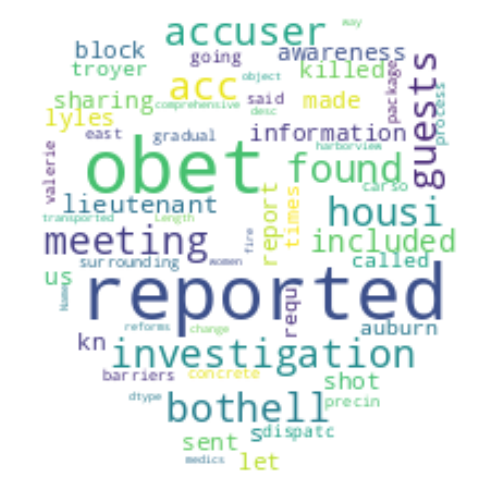

In [224]:
import numpy as np
from PIL import Image

# Create and generate a word cloud image:
spd_mask = np.array(Image.open('spd.jpg'))
wc = WordCloud(background_color='white',mask=spd_mask, max_words=500)

# for News summaries
wc.generate(str(df.desc))


# Display the generated image:
plt.figure(figsize = (16,9))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

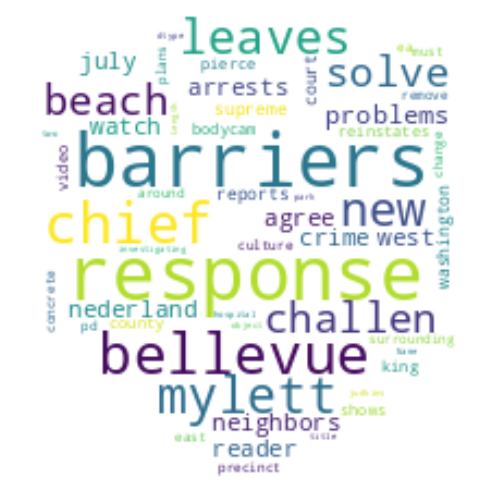

In [225]:
#For News Headlines
wc.generate(str(df.title))


# Display the generated image:
plt.figure(figsize = (16,9))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [190]:
df.title[0]

['bellevue', 'chief', 'mylett', 'leaves', 'new', 'challenges']

## Topic Modeling 

In [19]:
pip install pyLDAvis

  Using cached pyLDAvis-3.3.1-py2.py3-none-any.whl
  Using cached gensim-4.0.1-cp38-cp38-manylinux1_x86_64.whl (23.9 MB)
  Using cached scipy-1.7.0-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (28.4 MB)
  Using cached funcy-1.16-py2.py3-none-any.whl (32 kB)
  Using cached scikit_learn-0.24.2-cp38-cp38-manylinux2010_x86_64.whl (24.9 MB)
  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached numexpr-2.7.3-cp38-cp38-manylinux2010_x86_64.whl (473 kB)
  Using cached smart_open-5.1.0-py3-none-any.whl (57 kB)
Note: you may need to restart the kernel to use updated packages.


In [20]:
#for LDA
import pyLDAvis


# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/opt/conda/lib/python3.8/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [21]:
df_topic =df[['title', 'media', 'desc']]
df_topic.head()

,title,media,desc
0,"[bellevue, police, chief, mylett, leaves, new,...",The Seattle Times,"[investigation, bothell, police, department, f..."
1,"[police, scene, washington, mass, shooting, 6]",Yahoo News,"[washington, dc, police, department, said, six..."
2,"[civilian, police, oversight, across, country,...",Cleveland.com,"[seattle, example, city, community, police, co..."
3,"[police, solve, beach, problems, neighbors, ag...",West Seattle Blog...,"[guests, acc, meeting, included, lieutenant, s..."
4,"[nederland, police, department, arrests, respo...",Port Arthur News,"[information, reported, made, 3000, block, sea..."


In [22]:
# Create Dictionary
headline_dictionary = corpora.Dictionary(df_topic.title)

# Create Corpus
headline_texts = df_topic['title']

# Term Document Frequency
corpus = [headline_dictionary.doc2bow(text) for text in headline_texts]


In [23]:
# Create Dictionary
summary_dictionary = corpora.Dictionary(df_topic.title)

# Create Corpus
summary_texts = df_topic['desc']

# Term Document Frequency
corpus_sum = [summary_dictionary.doc2bow(text) for text in summary_texts]


In [24]:
# number of topics
num_topics = 10

# Build LDA model
lda_model_headline = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=headline_dictionary,
                                       num_topics=num_topics,
                                       random_state =42)

In [25]:
# number of topics
num_topics = 10

# Build LDA model
lda_model_summary = gensim.models.LdaMulticore(corpus=corpus_sum,
                                       id2word=summary_dictionary,
                                       num_topics=num_topics,
                                       random_state =42)

In [26]:
from pprint import pprint

In [27]:
pprint(lda_model_headline.print_topics())
doc_lda_headline = lda_model_headline[corpus]

[(0,
  '0.080*"seattle" + 0.061*"police" + 0.020*"spd" + 0.016*"officers" + '
  '0.015*"city" + 0.012*"officer" + 0.011*"cops" + 0.010*"mayor" + 0.010*"two" '
  '+ 0.010*"man"'),
 (1,
  '0.076*"police" + 0.047*"seattle" + 0.029*"spd" + 0.021*"department" + '
  '0.020*"shooting" + 0.014*"blotter" + 0.012*"chief" + 0.012*"three" + '
  '0.010*"officer" + 0.010*"city"'),
 (2,
  '0.068*"police" + 0.066*"seattle" + 0.035*"officer" + 0.031*"spd" + '
  '0.019*"man" + 0.018*"shooting" + 0.014*"blotter" + 0.014*"suspect" + '
  '0.011*"officers" + 0.011*"killed"'),
 (3,
  '0.092*"police" + 0.061*"seattle" + 0.027*"officer" + 0.021*"chief" + '
  '0.019*"arrest" + 0.018*"man" + 0.017*"officers" + 0.014*"spd" + '
  '0.014*"city" + 0.013*"killed"'),
 (4,
  '0.090*"police" + 0.085*"seattle" + 0.020*"officers" + 0.020*"officer" + '
  '0.017*"department" + 0.015*"east" + 0.015*"man" + 0.014*"precinct" + '
  '0.012*"concrete" + 0.011*"harris"'),
 (5,
  '0.100*"seattle" + 0.095*"police" + 0.014*"officer" 

In [28]:
pprint(lda_model_summary.print_topics())
doc_lda_summary = lda_model_summary[corpus_sum]

[(0,
  '0.128*"seattle" + 0.107*"police" + 0.081*"department" + 0.036*"spd" + '
  '0.029*"officers" + 0.023*"city" + 0.012*"council" + 0.011*"said" + '
  '0.010*"redmond" + 0.010*"last"'),
 (1,
  '0.126*"police" + 0.099*"department" + 0.088*"seattle" + 0.037*"spd" + '
  '0.018*"said" + 0.014*"officers" + 0.013*"one" + 0.012*"people" + '
  '0.012*"year" + 0.011*"council"'),
 (2,
  '0.104*"seattle" + 0.096*"police" + 0.064*"department" + 0.051*"spd" + '
  '0.026*"officer" + 0.022*"year" + 0.017*"said" + 0.016*"safety" + '
  '0.015*"officers" + 0.015*"public"'),
 (3,
  '0.126*"police" + 0.093*"seattle" + 0.090*"department" + 0.035*"officer" + '
  '0.019*"chief" + 0.018*"harris" + 0.016*"said" + 0.014*"year" + '
  '0.014*"officers" + 0.013*"lexi"'),
 (4,
  '0.120*"police" + 0.119*"seattle" + 0.097*"department" + 0.033*"spd" + '
  '0.027*"officers" + 0.021*"public" + 0.019*"crime" + 0.019*"safety" + '
  '0.018*"laws" + 0.018*"east"'),
 (5,
  '0.133*"seattle" + 0.132*"police" + 0.094*"depart